# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.144094e+01     8.641447e+00
 * time: 0.003986835479736328
     1     2.783477e+01     5.085756e+00
 * time: 0.012045860290527344
     2     2.025412e+01     5.637996e+00
 * time: 0.03148198127746582
     3     1.377907e+01     2.547453e+00
 * time: 0.054576873779296875
     4     1.094276e+01     1.311624e+00
 * time: 0.07390594482421875
     5     1.087689e+01     2.776955e+00
 * time: 0.08928799629211426
     6     1.011345e+01     1.732855e+00
 * time: 0.10468792915344238
     7     9.310653e+00     1.684385e+00
 * time: 0.11990690231323242
     8     9.097974e+00     1.115266e+00
 * time: 0.13517284393310547
     9     8.997284e+00     1.836839e+00
 * time: 0.14673900604248047
    10     8.938414e+00     1.648990e+00
 * time: 0.15828180313110352
    11     8.925842e+00     1.315048e+00
 * time: 0.16975188255310059
    12     8.777677e+00     1.089424e+00
 * time: 0.18133902549743652
    13     8.691801e+00     7.028434e-01
 * ti

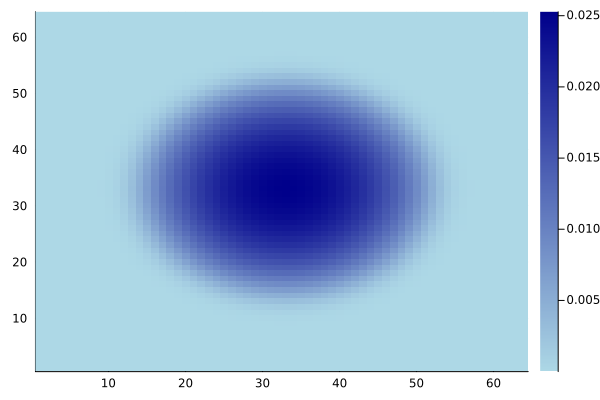

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)